# Nano Object and Lattice Notebook

## From here we bring in all of the objects and lattices we will use

In [1]:
from ScatterSim.NanoObjects import SphereNanoObject, PolydisperseNanoObject, PyramidNanoObject
# We'll import a few lattices, cubic, FCC, BCC and Diamond
from ScatterSim.LatticeObjects import SimpleCubic, FCCLattice, BCCLattice, DiamondTwoParticleLattice
# import the peak shape for the peaks, tunable
from ScatterSim.PeakShape import PeakShape
from ScatterSim.CompositeNanoObjects import CompositeNanoObject, OctahedronNanoObject, OctahedronCylindersNanoObject


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Running all Object Types from Julien
#http://jupyter.org/widgets.html for interactivity (later)

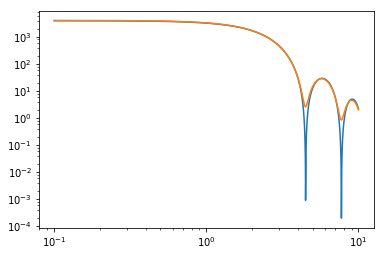

In [2]:
pargs_sphere1 = {'radius' : 1}
sphere1 = SphereNanoObject(pargs_sphere1)


pargs_polysphere = dict(radius= 1, sigma_R=.04) 
sphere2 = PolydisperseNanoObject(SphereNanoObject, pargs_polysphere, argname='radius', argstdname='sigma_R')

q = np.linspace(0.1, 10, 1000)
peak = PeakShape(delta=0.03, nu=0.01) 
lattice_spacing = 10.

sq_sphere1= sphere1.form_factor_squared_isotropic(q)
sq_sphere2=sphere2.form_factor_squared_isotropic(q)

plt.figure(0);
plt.clf()
plt.loglog(q, sq_sphere1)


# even with a small polydispersity (4%), polydisperse sphere scattering looks much different
#plt.figure(1);
#plt.clf()
plt.loglog(q, sq_sphere2)


In [3]:
## Some more built in classes for nano-objects



In [4]:
lat_fcc1 = FCCLattice([sphere1], lattice_spacing_a=lattice_spacing)
Iq_fcc1 = lat_fcc1.intensity(q, peak)
Sq_fcc1 = lat_fcc1.structure_factor_isotropic(q, peak)
print("Finished calculating Face Centered Cubic 1")


lat_fcc2 = FCCLattice([sphere2], lattice_spacing_a=lattice_spacing)
Iq_fcc2 = lat_fcc2.intensity(q, peak)
Sq_fcc2 = lat_fcc2.structure_factor_isotropic(q, peak)
print("Finished calculating Face Centered Cubic 2")



Finished calculating Face Centered Cubic 1
Finished calculating Face Centered Cubic 2


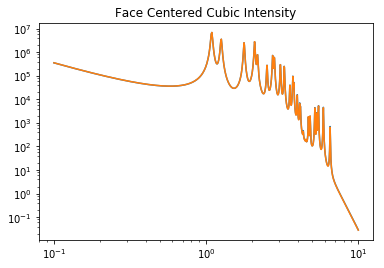

In [5]:
plt.figure(2);
plt.clf()
plt.title("Face Centered Cubic Intensity")
plt.loglog(q, Iq_fcc1)
plt.loglog(q, Iq_fcc2)


In [6]:
def show_projections(V_xy, V_xz, V_yz, height, num=4):
    '''plot the xy, xz, and yz projections with height used from 
        projections function, in figure num
    '''
    extent = [-height, height, height, -height]
    plt.figure(num);plt.clf();
    plt.subplot(2,2,1)
    plt.title("x-y plane")
    plt.imshow(V_xy,extent=extent)
    plt.subplot(2,2,2)
    plt.title("y-z plane")
    plt.imshow(V_yz,extent=extent)
    plt.subplot(2,2,3)
    plt.title("x-z plane")
    plt.imshow(V_xz,extent=extent)

In [7]:
#Pyramids Attempt

py_pargs_bottom = {'radius':2, 'phi':90}
py_pargs_top = {'radius':2, 'phi':-90 }

py_obj = [PyramidNanoObject,PyramidNanoObject]

py_params = [py_pargs_bottom, py_pargs_top]


pyramids = CompositeNanoObject(py_obj,py_params,pargs={})

rmax = 4
V_xy, V_yz, V_xz = pyramids.projections(rmax)




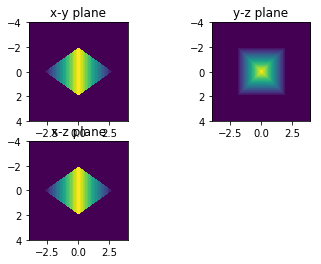

In [8]:
plt.figure(3);
plt.clf()
show_projections(V_xy, V_yz, V_xz, rmax, num=3)

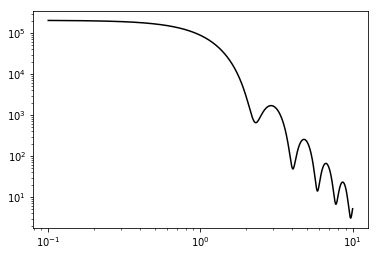

In [9]:
sq_octahedron_solid = pyramids.form_factor_squared_isotropic(q)

plt.figure(4);
plt.clf()

plt.loglog(q, sq_octahedron_solid,color='k', label="one solid octa")

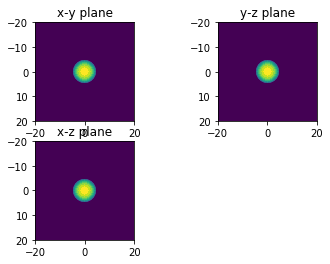

In [10]:
pargs_polysphere = dict(radius= 5, sigma_R=.0004)
lattice_spacing = 5. # 10 times radius (1 nm)

from functools import partial
PolySphereClass = partial(PolydisperseNanoObject,SphereNanoObject)

one_polysphere = PolySphereClass(pargs_polysphere, argname='radius', argstdname='sigma_R')


pargs_sphere1 = {'x0' : 0, 'y0' : 0, 'z0' : 0}
pargs_sphere1.update(pargs_polysphere)
pargs_sphere2 = {'x0' : 0.5*lattice_spacing, 'y0' : 0.5*lattice_spacing, 'z0' : 0.5*lattice_spacing}
pargs_sphere2.update(pargs_polysphere)


# inputs are the list of initializer classes, and the defining parameters
two_polyspheres = CompositeNanoObject([PolySphereClass, PolySphereClass], [pargs_sphere1, pargs_sphere2])




qmax = 10
#P2_xy, P2_yz, P2_xz = form_factor_slices(two_polyspheres, qmax)
rmax = 20
V_xy, V_yz, V_xz = two_polyspheres.projections(rmax)

show_projections(V_xy, V_yz, V_xz, rmax, 4)


In [11]:
def show_projections(V_xy, V_xz, V_yz, length, num=4):
    '''plot the xy, xz, and yz projections with length used from 
        projections function, in figure num
    '''
    extent = [-length/2, length/2., length/2., -length/2.]
    #plt.figure(num);plt.clf();
    plt.subplot(2,2,1)
    plt.title("x-y plane")
    plt.imshow(V_xy,extent=extent)
    plt.subplot(2,2,2)
    plt.title("x-z plane")
    plt.imshow(V_xz,extent=extent)
    plt.subplot(2,2,3)
    plt.title("y-z plane")
    plt.imshow(V_yz,extent=extent)

## Composites and Octahedron

# NanoCompositeObject

Wall time: 2.97 s


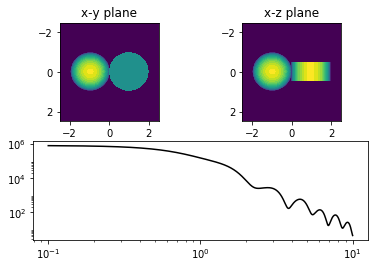

In [12]:

from ScatterSim.CompositeNanoObjects import CompositeNanoObject
from ScatterSim.NanoObjects import SphereNanoObject, CylinderNanoObject
import matplotlib.pyplot as plt

sphere_pargs = {'radius':2, 'x0':-2}
cylinder_pargs = {'radius':2, 'height':2, 'x0':2}

objs = [SphereNanoObject,CylinderNanoObject]

obj_params = [sphere_pargs,cylinder_pargs]


sphere_cylinder = CompositeNanoObject(objs,obj_params,pargs={})

rmax = 5
V_xy, V_yz, V_xz = sphere_cylinder.projections(rmax)
%time sphere_cylinder_ff = sphere_cylinder.form_factor_squared_isotropic(q)

plt.figure('sphere-cylinder');
plt.clf()
plt.subplot(2,1,1)
show_projections(V_xy, V_yz, V_xz, rmax, num=4)
plt.subplot(2,1,2)
q = np.linspace(0.1, 10, 1000)
plt.loglog(q,sphere_cylinder_ff,color='k', label="sphere_cylinder")


# Using OctahedronNanoObject
#solid object

Wall time: 7.98 s


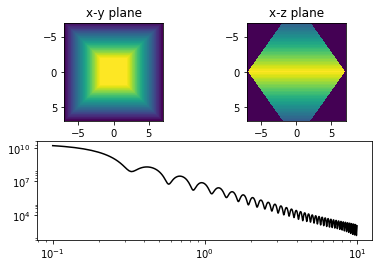

In [13]:


from ScatterSim.CompositeNanoObjects import OctahedronNanoObject
import matplotlib.pyplot as plt

#based on the pyramid nanoobject which has pargs of:
# look at NanoObject file for more details
pargs = {'radius': 14}
two_pyr = OctahedronNanoObject(pargs)


rmax = pargs['radius']
V_xy, V_yz, V_xz = two_pyr.projections(rmax)
%time two_pyr_ff = two_pyr.form_factor_squared_isotropic(q)


plt.figure('octa-pyramid');
plt.clf()
plt.subplot(2,1,1)
show_projections(V_xy, V_yz, V_xz, rmax, num=4)
plt.subplot(2,1,2)
q = np.linspace(0.1, 10, 1000)
plt.loglog(q,two_pyr_ff,color='k', label="solid_oct")



# Using HollowOctahedronNanoObject 
##WARNING THIS TAKES A WHILE DEP ON COMPUTER


Wall time: 27.9 s


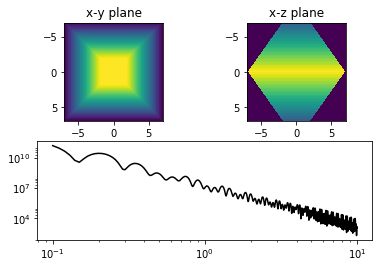

In [43]:

from ScatterSim.CompositeNanoObjects import HollowOctahedronNanoObject
import matplotlib.pyplot as plt

#based on the pyramid nanoobject which has pargs of:
# look at NanoObject file for more details
pargs = {'radius': 14, 'radius_ratio':2}
hollow_oct = HollowOctahedronNanoObject(pargs)


rmax = pargs['radius']
Vi_xy, Vi_yz, Vi_xz = hollow_oct.projections(rmax)
%time hollow_oct_ff = hollow_oct.form_factor_squared_isotropic(q)


plt.figure('octa-hollow');
plt.clf()
plt.subplot(2,1,1)
show_projections(Vi_xy, Vi_yz, Vi_xz, rmax, num=4)
plt.subplot(2,1,2)
q = np.linspace(0.1, 10, 1000)
plt.loglog(q,hollow_oct_ff,color='k', label="hollow_oct")


# OctahedronCylindersNanoObject

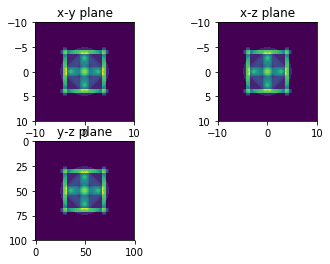

In [44]:
#cylindernanoobject #need to spend some time getting the nuance
from ScatterSim.CompositeNanoObjects import OctahedronCylindersNanoObject
from ScatterSim.NanoObjects import SphereNanoObject, CylinderNanoObject
import matplotlib.pyplot as plt


base = CylinderNanoObject
linker = SphereNanoObject
#linker = base
pargs = {'edgelength':10, 'radius':2,'height':10,'linkerlength':2, 'linkerradius':10}

octahedron = OctahedronCylindersNanoObject(base, linker,pargs)

rmax = 20
Vi_xy, Vi_yz, Vi_xz = octahedron.projections(rmax)
q = np.linspace(0.1, 10, 1000)
octahedron_ff = octahedron.form_factor_squared_isotropic(q)


plt.figure('octa-hollow');
plt.clf()
plt.subplot(2,1,1)
show_projections(Vi_xy, Vi_yz, Vi_xz, rmax, num=2)
#plt.subplot(2,1,2)
#q = np.linspace(0.1, 10, 1000)
#plt.loglog(q,octahedron_ff,color='k', label="octahedron_cylinders")
plt.imshow(Vi_xy)



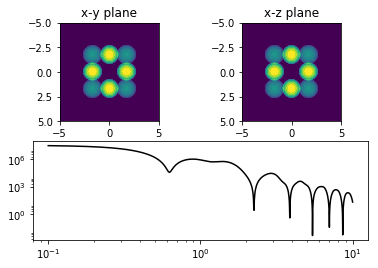

In [15]:
#cylindernanoobject #need to spend some time getting the nuance
from ScatterSim.CompositeNanoObjects import OctahedronCylindersNanoObject
from ScatterSim.NanoObjects import SphereNanoObject, CylinderNanoObject
import matplotlib.pyplot as plt


base = SphereNanoObject
linker = SphereNanoObject
#linker = base
pargs = {'edgelength':10, 'radius':2,'height':10}

octahedron = OctahedronCylindersNanoObject(base, linker,pargs)

rmax = pargs['edgelength']
Vi_xy, Vi_yz, Vi_xz = octahedron.projections(rmax)
q = np.linspace(0.1, 10, 1000)
octahedron_ff = octahedron.form_factor_squared_isotropic(q)


plt.figure('octa-hollow');
plt.clf()
plt.subplot(2,1,1)
show_projections(Vi_xy, Vi_yz, Vi_xz, rmax, num=4)
plt.subplot(2,1,2)
q = np.linspace(0.1, 10, 1000)
plt.loglog(q,octahedron_ff,color='k', label="octahedron_cylinders")



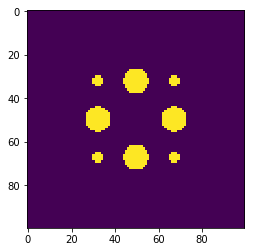

In [16]:
from ipywidgets import widgets 
%matplotlib inline 
length = 10
npoints = 100
x = np.linspace(-length, length, npoints)
# ij indexing means that we index in V[x,y,z]
# Note that rightermost index is fastest varying index
x, y, z = np.meshgrid(x,x,x,indexing='ij')
V = octahedron.V(np.array([x,y,z]))


def f(x):
    i = x
    plt.figure('oct real space');
    plt.clf()
    plt.imshow(V[:,:,i])
    
widgets.interact(f,x=50)


In [46]:
octahedron.check_arg('edgelength',pargs)

10

# Comparing the Different FF of Octahedron Models

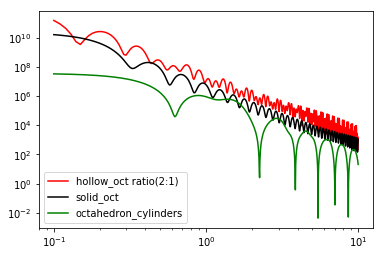

In [47]:
#Comparing the Different FF assuming radius of about 15 for all objects

plt.figure('cong')
plt.clf()
#plt.loglog(q,sphere_cylinder_ff,color='g', label="sphere_cylinder")
plt.loglog(q,hollow_oct_ff,color='r', label="hollow_oct ratio(2:1)")
plt.loglog(q,two_pyr_ff,color='k', label="solid_oct")
plt.loglog(q,octahedron_ff,color='g', label="octahedron_cylinders")
plt.legend(loc='lower left')


# Cubic Cylinder NanoObject

Wall time: 3.88 s


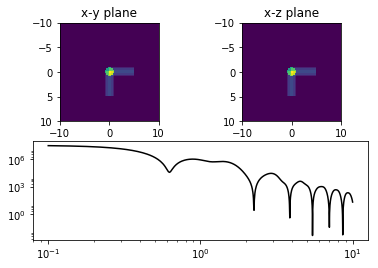

In [48]:
#cylindernanoobject #need to spend some time getting the nuance
from ScatterSim.CompositeNanoObjects import CubicCylindersNanoObject
from ScatterSim.NanoObjects import SphereNanoObject, CylinderNanoObject
import matplotlib.pyplot as plt


base = CylinderNanoObject
linker = base
pargs = {'radius':2,'height':10}

cubic_cylinder = CubicCylindersNanoObject(base, linker,pargs)

rmax = 20
Vi_xy, Vi_yz, Vi_xz = cubic_cylinder.projections(rmax)
%time cubic_cylinder_ff = cubic_cylinder.form_factor_squared_isotropic(q)


plt.figure('cubic cylinder');
plt.clf()
plt.subplot(2,1,1)
show_projections(Vi_xy, Vi_yz, Vi_xz, rmax, num=4)
plt.subplot(2,1,2)
q = np.linspace(0.1, 10, 1000)
plt.loglog(q,octahedron_ff,color='k', label="cubic_cylinder")


# CoreShellNanoObject

Wall time: 2.16 s
Wall time: 0 ns


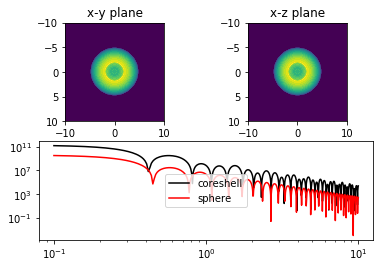

In [49]:
from ScatterSim.CompositeNanoObjects import CoreShellNanoObject
from ScatterSim.NanoObjects import SphereNanoObject, CylinderNanoObject
import matplotlib.pyplot as plt
from ipywidgets import widgets 




    
pargs = {'radius_inner': 4, 
     'radius_outer':10, 
     'rho_ambient':9.43,
    'rho_object_inner':9.43,
    'rho_object_outer':119.16}

coreshell = CoreShellNanoObject(pargs)
sphere_parg = {'radius':10}
sphere = SphereNanoObject(sphere_parg)

rmax = 20
Vi_xy, Vi_yz, Vi_xz = coreshell.projections(rmax)
%time coreshell_ff = coreshell.form_factor_squared_isotropic(q)
%time sphere_ff = sphere.form_factor_squared_isotropic(q)
plt.figure('coreshell');
plt.clf()
plt.subplot(2,1,1)
show_projections(Vi_xy, Vi_yz, Vi_xz, rmax, num=4)
plt.subplot(2,1,2)
q = np.linspace(0.1, 10, 1000)
plt.loglog(q,coreshell_ff,color='k', label="coreshell")
plt.loglog(q,sphere_ff,color='r', label='sphere')
plt.legend(loc='center')

# Six Cylinder NanoObject

Wall time: 6.69 s


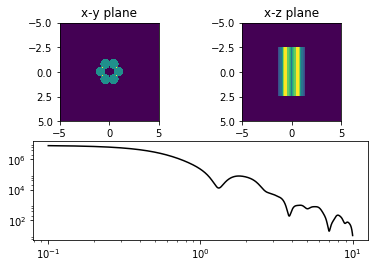

In [50]:
from ScatterSim.CompositeNanoObjects import SixCylinderNanoObject
from ScatterSim.NanoObjects import SphereNanoObject, CylinderNanoObject
import matplotlib.pyplot as plt

pargs = {'radius':1,'height':10}

six_cyl = SixCylinderNanoObject(pargs)

rmax = 10
Vi_xy, Vi_yz, Vi_xz = six_cyl.projections(rmax)
%time six_cyl_ff = six_cyl.form_factor_squared_isotropic(q)


plt.figure('six_cyl');
plt.clf()
plt.subplot(2,1,1)
show_projections(Vi_xy, Vi_yz, Vi_xz, rmax, num=4)
plt.subplot(2,1,2)
q = np.linspace(0.1, 10, 1000)
plt.loglog(q,six_cyl_ff,color='k', label="six_cyl")

# Cylinder Dumbbell NanoObject

Wall time: 4.27 s


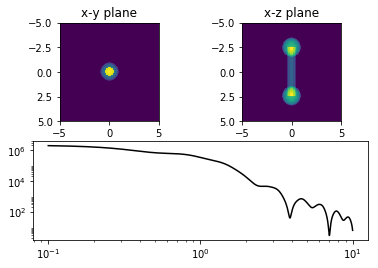

In [51]:
from ScatterSim.CompositeNanoObjects import CylinderDumbbellNanoObject
from ScatterSim.NanoObjects import SphereNanoObject, CylinderNanoObject
import matplotlib.pyplot as plt

pargs = {'cylinder_radius':1,
         'cylinder_height':10,
        'cylinder_density':1,
        'sphere_radius':2,
        'sphere_density':1}

thingie = CylinderDumbbellNanoObject(pargs)

rmax = 10
Vi_xy, Vi_yz, Vi_xz = thingie.projections(rmax)
%time dumbell_ff = thingie.form_factor_squared_isotropic(q)


plt.figure('thingie');
plt.clf()
plt.subplot(2,1,1)
show_projections(Vi_xy, Vi_yz, Vi_xz, rmax, num=4)
plt.subplot(2,1,2)
q = np.linspace(0.1, 10, 1000)
plt.loglog(q,dumbell_ff,color='k', label="dumbell")

# Cylinder Bulge Nano Object

Wall time: 3 s


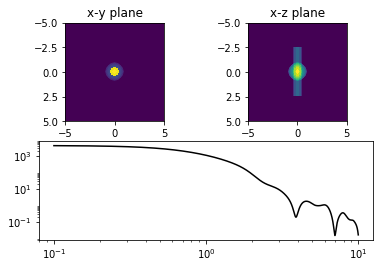

In [52]:
from ScatterSim.CompositeNanoObjects import CylinderBulgeNanoObject
from ScatterSim.NanoObjects import SphereNanoObject, CylinderNanoObject
import matplotlib.pyplot as plt

pargs = {'cylinder_radius':1,
         'cylinder_height':10,
        'cylinder_density':1,
        'sphere_radius':2,
        'sphere_density':1}

thingie = CylinderBulgeNanoObject(pargs)

rmax = 10
Vi_xy, Vi_yz, Vi_xz = thingie.projections(rmax)
%time bulge_ff = thingie.form_factor_squared_isotropic(q)


plt.figure('thingie');
plt.clf()
plt.subplot(2,1,1)
show_projections(Vi_xy, Vi_yz, Vi_xz, rmax, num=4)
plt.subplot(2,1,2)
q = np.linspace(0.1, 10, 1000)
plt.loglog(q,bulge_ff,color='k', label="bulge")

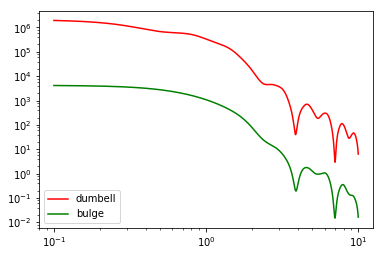

In [53]:
plt.figure('comparte dumbells')
plt.clf();
plt.loglog(q,dumbell_ff,color='r', label="dumbell")
plt.loglog(q,bulge_ff,color='g', label="bulge")
plt.legend(loc='lower left')

In [54]:
import numpy
from mayavi.mlab import *

def test_contour3d():
    x, y, z = numpy.ogrid[-5:5:64j, -5:5:64j, -5:5:64j]

    scalars = x * x * 0.5 + y * y + z * z * 2.0

    obj = contour3d(scalars, contours=4, transparent=True)
    return obj

In [55]:
test_contour3d

<function __main__.test_contour3d>

In [17]:
import numpy
from mayavi.mlab import *

def test_barchart():
    """ Demo the bar chart plot with a 2D array.
    """
    s = numpy.abs(numpy.random.random((3, 3)))
    return barchart(s)
barchart

<function mayavi.tools.helper_functions.document_pipeline.<locals>.the_function>

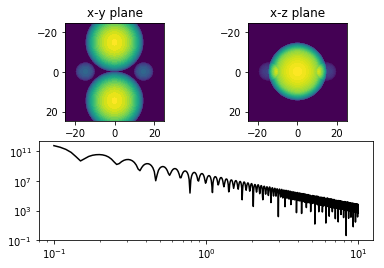

In [21]:
from ScatterSim.CompositeNanoObjects import CompositeNanoObject
from ScatterSim.NanoObjects import SphereNanoObject
import matplotlib.pyplot as plt

sphere_pargs_10L = {'radius':10, 'x0':-30, 'y0':-30}
sphere_pargs_10R = {'radius':10, 'x0':+30,'y0':}
sphere_pargs_10L = {'radius':10, 'x0':-30}
sphere_pargs_10R = {'radius':10, 'x0':+30}

sphere_pargs_20T = {'radius':30, 'z0':-30}
sphere_pargs_20B = {'radius':30, 'z0':+30}

objs = [SphereNanoObject,SphereNanoObject,SphereNanoObject,SphereNanoObject]

obj_params = [sphere_pargs_10L,sphere_pargs_20T,sphere_pargs_10R,sphere_pargs_20B]


sphere_square = CompositeNanoObject(objs,obj_params)

rmax = 50
V_xy, V_yz, V_xz = sphere_square.projections(rmax)
%time sphere_square_ff = sphere_square.form_factor_squared_isotropic(q)

plt.figure('sphere_square');
plt.clf()
plt.subplot(2,1,1)
show_projections(V_xy, V_yz, V_xz, rmax, num=4)
plt.subplot(2,1,2)
q = np.linspace(0.1, 10, 1000)
plt.loglog(q,sphere_square_ff,color='k', label="sphere_square")

In [ ]:
#attempt to put into a sc lattice

